In [2]:
#import packages

import requests
import json
import re
import pandas as pd
from bs4 import BeautifulSoup 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read data 
textData = pd.read_csv("AllTextData.csv")
textData = textData[textData["Sentiment"] != "remove"]

textData

,Unnamed: 0,Type,Sentiment,Content
0,0,News,pos,The vision I want people to understand that ve...
1,1,News,neg,All is quiet at a m on a Thursday in Shibuya T...
2,2,News,neg,ADVERTISEMENT Healthy eating and nutrition are...
3,3,News,neg,LEAN RED MEAT A gut healthy heart smart choice...
4,4,News,neg,Why Vegans Don t Eat Honey Honey is a sweet vi...
...,...,...,...,...
208,208,blog,pos,My story did not start at veganism At age I le...
209,209,blog,neg,Actor Samuel L Jackson previously admitted tha...
210,210,blog,neg,Am I Vegan This is a very common question that...
211,211,news,neg,Opinion Veganism isn t necessarily the most et...


In [6]:
#Transform Data
#Build Lemmer
LEMMER = WordNetLemmatizer() 
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

#CountVectorizer transformation using stemming
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,
                        #max_features=20,
                        max_df = 90,
                        min_df = 3,
                        )

Vect_Lem = MyVect_LEM.fit_transform(textData['Content'])
ColumnNames_s=MyVect_LEM.get_feature_names_out()
CorpusDF_Lem=pd.DataFrame(Vect_Lem.toarray(),columns=ColumnNames_s)
#print(CorpusDF_Lem)
CorpusDF_Lem

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


,abandonment,ability,able,absence,absolute,absolutely,absorb,absorbed,absorbing,absorbs,...,youth,youthful,youtube,z,za,zero,zinc,zone,zu,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,1,3,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
CorpusDF_Lem.to_csv("CV_MaxFeatures.csv", index = False)

In [17]:
from sklearn.decomposition import LatentDirichletAllocation 

NUM_TOPICS=4
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(CorpusDF_Lem)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, MyVect_LEM)



(153, 4)
LDA Model:
Topic 0:
[('protein', 907.9269996930246), ('meal', 296.0830380528135), ('nutrient', 238.02279716798105), ('raw', 229.09471302693805), ('help', 223.87350226530168), ('vegetable', 214.36680748577433), ('healthy', 211.39306165780386), ('vitamin', 209.71856755534554), ('seed', 207.39416319645898), ('muscle', 206.5137123055085)]
Topic 1:
[('milk', 107.47436485442927), ('cream', 107.11674375382547), ('ice', 106.60262320360353), ('market', 89.85468288428093), ('sustainable', 85.58895000869983), ('emission', 71.70163647985055), ('soil', 66.70872633757928), ('ethical', 63.905297887207524), ('environmental', 63.04359993142623), ('dairy', 61.985073779807)]
Topic 2:
[('data', 108.59252303366044), ('veganuary', 103.23106286876543), ('recipe', 93.31355677326596), ('http', 92.09920518935218), ('content', 89.01554592813437), ('blog', 85.9068992068519), ('wa', 85.324724230588), ('u', 76.88701437277253), ('com', 75.07698032594612), ('said', 73.0124397812828)]
Topic 3:
[('wa', 572.768

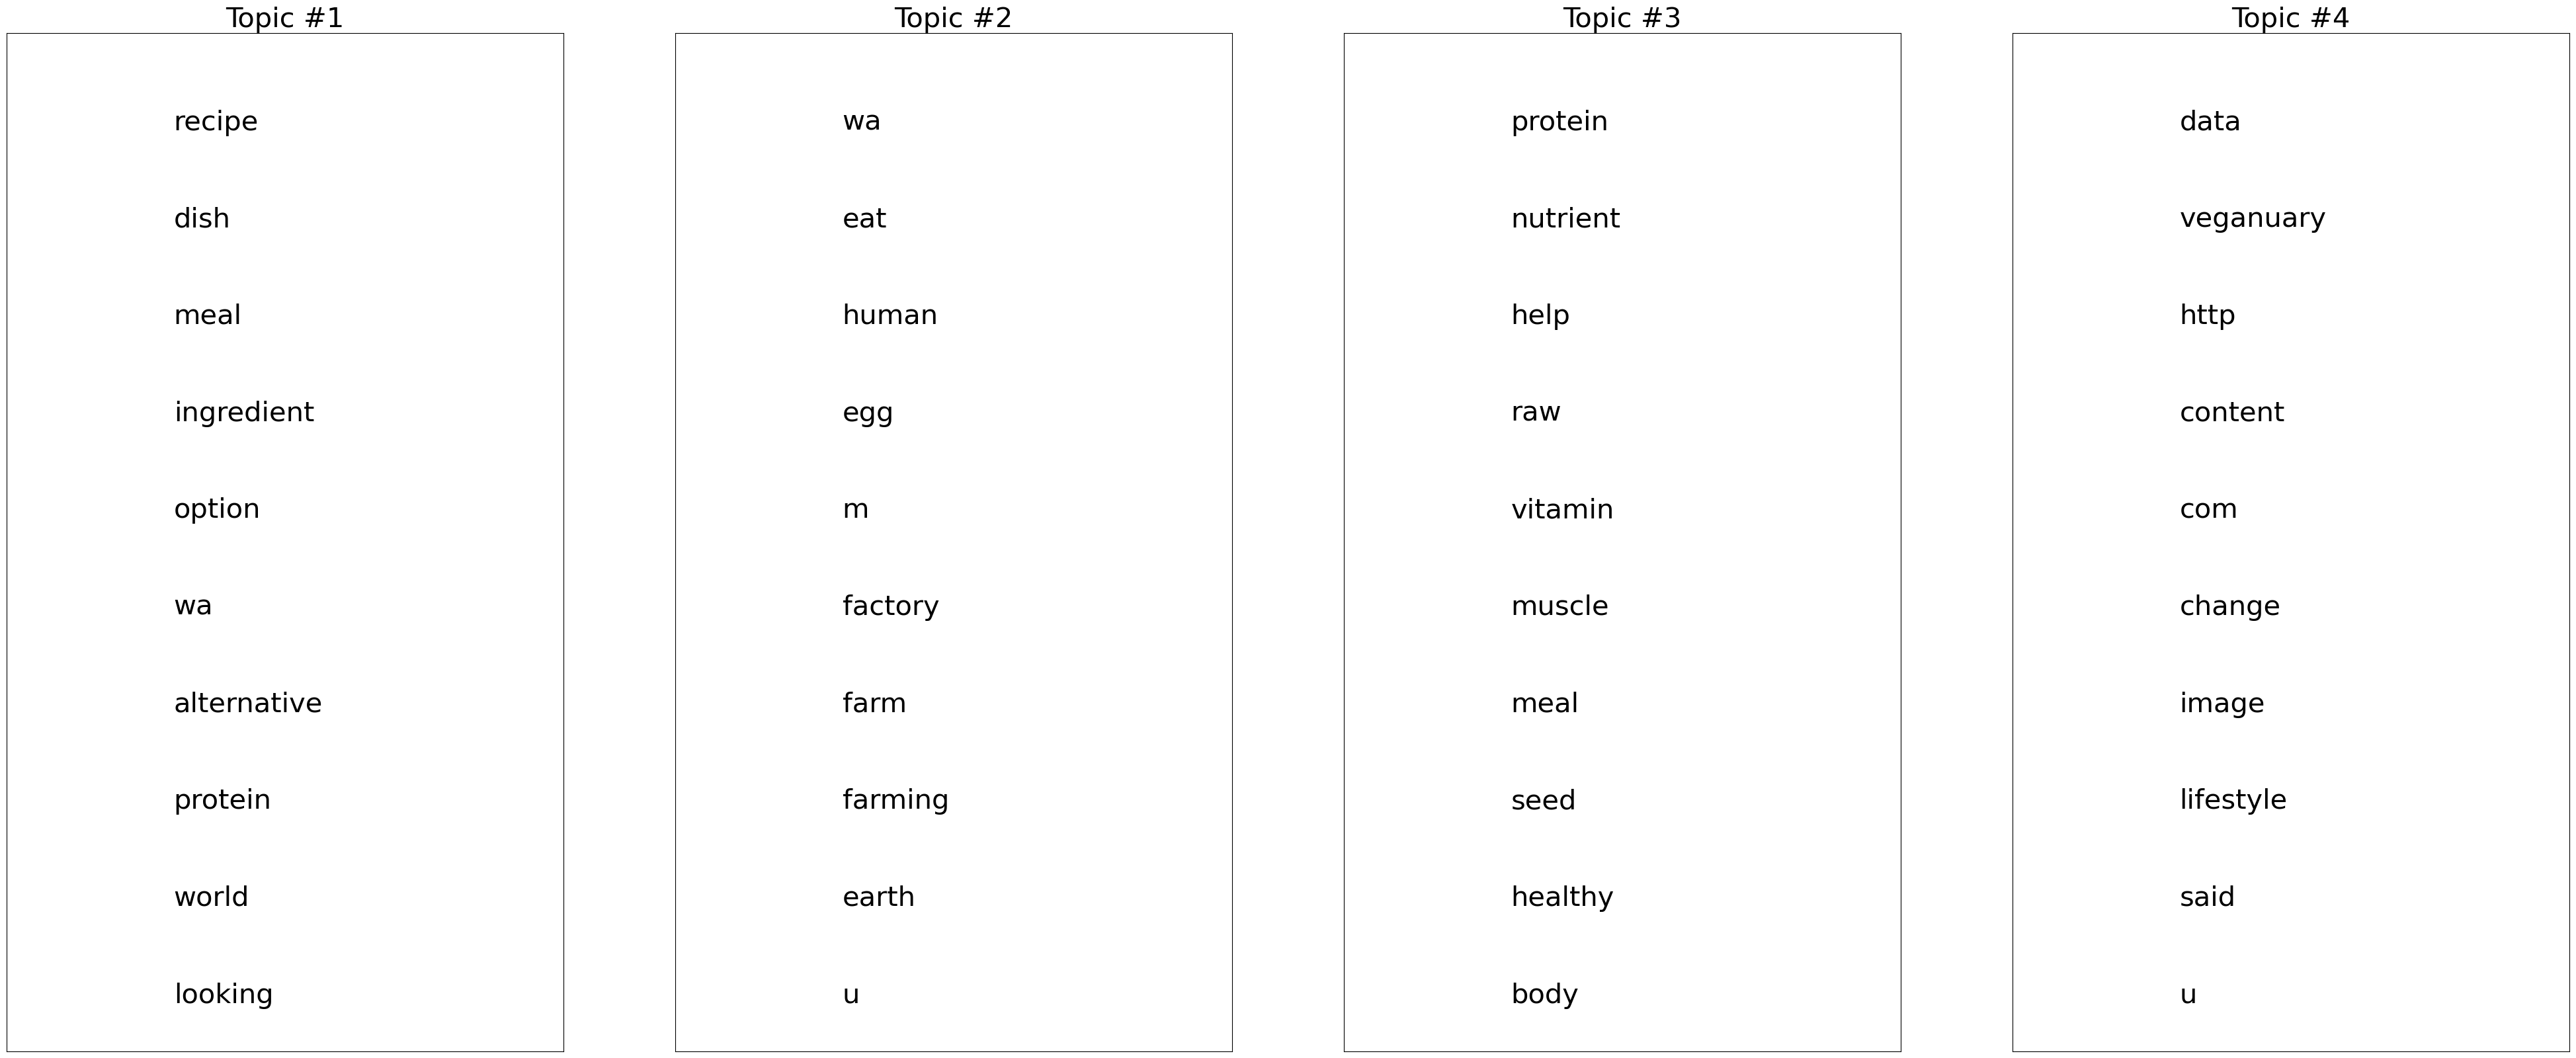

In [11]:
################ Another fun vis for LDA
plt.figure(figsize=(50,20))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(ColumnNames_s)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 60

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1), fontsize=30)
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("TopicsVis.pdf")
plt.show()

In [25]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.lda_model  # Correct import for LDA visualization

#import pyLDAvis.sklearn as LDAvis
import pyLDAvis


# ## 
pyLDAvis.enable_notebook() ## not using notebook


In [27]:
# Convert BoW matrix to document-topic distribution
topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
doc_topic_dists = lda_Z_DF
doc_lengths = np.array(Vect_Lem.sum(axis=1)).flatten()
vocab = MyVect_LEM.get_feature_names_out()
term_frequency = np.array(Vect_Lem.sum(axis=0)).flatten()

In [29]:
panel = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists, 
    doc_topic_dists=doc_topic_dists, 
    doc_lengths=doc_lengths, 
    vocab=vocab, 
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(panel)

In [31]:
pyLDAvis.save_html(panel, 'lda_visualization.html')


In [33]:
textData = textData.reset_index(drop = True)
sentiments = textData["Sentiment"]
sentiments

0      pos
1      neg
2      neg
3      neg
4      neg
      ... 
148    pos
149    neg
150    neg
151    neg
152    neg
Name: Sentiment, Length: 153, dtype: object

In [35]:
DF = CorpusDF_Lem.join(sentiments)
DF

PosDF = DF[DF["Sentiment"] =="pos"]
PosDF = PosDF.drop('Sentiment',axis = 1)
#PosDF

NegDF = DF[DF["Sentiment"] =="neg"]
NegDF =  NegDF.drop('Sentiment',axis = 1)
#NegDF

In [37]:
###Topics modeling for pro and anti vegan articles

NUM_TOPICS=3
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(NegDF)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("Neg Review LDA Model:")
print_topics(lda_model, MyVect_LEM)



(36, 3)
Neg Review LDA Model:
Topic 0:
[('egg', 32.343401969815915), ('bird', 23.371278129924182), ('hen', 22.36575997970243), ('nutrition', 18.347335429512267), ('research', 16.348612984395444), ('farm', 16.345001098057686), ('risk', 15.345386994843063), ('study', 12.344492730957631), ('significant', 11.340612955200042), ('result', 11.339159642907102)]
Topic 1:
[('human', 50.17556293726879), ('nature', 38.343370510114354), ('eat', 36.32119920588317), ('suffering', 30.34029494397072), ('instead', 29.353335277294548), ('world', 28.30667133501611), ('http', 26.33654955064458), ('need', 26.141235066088697), ('com', 23.340683858082055), ('don', 22.345262980179772)]
Topic 2:
[('protein', 296.17472043936505), ('wa', 118.82658277092372), ('nutrient', 100.78253543245205), ('eat', 93.34798900651845), ('source', 89.33172219958873), ('healthy', 86.65928787363421), ('support', 82.33247782218784), ('need', 81.5278640570249), ('dietary', 79.33241634596453), ('vitamin', 78.33329422457966)]


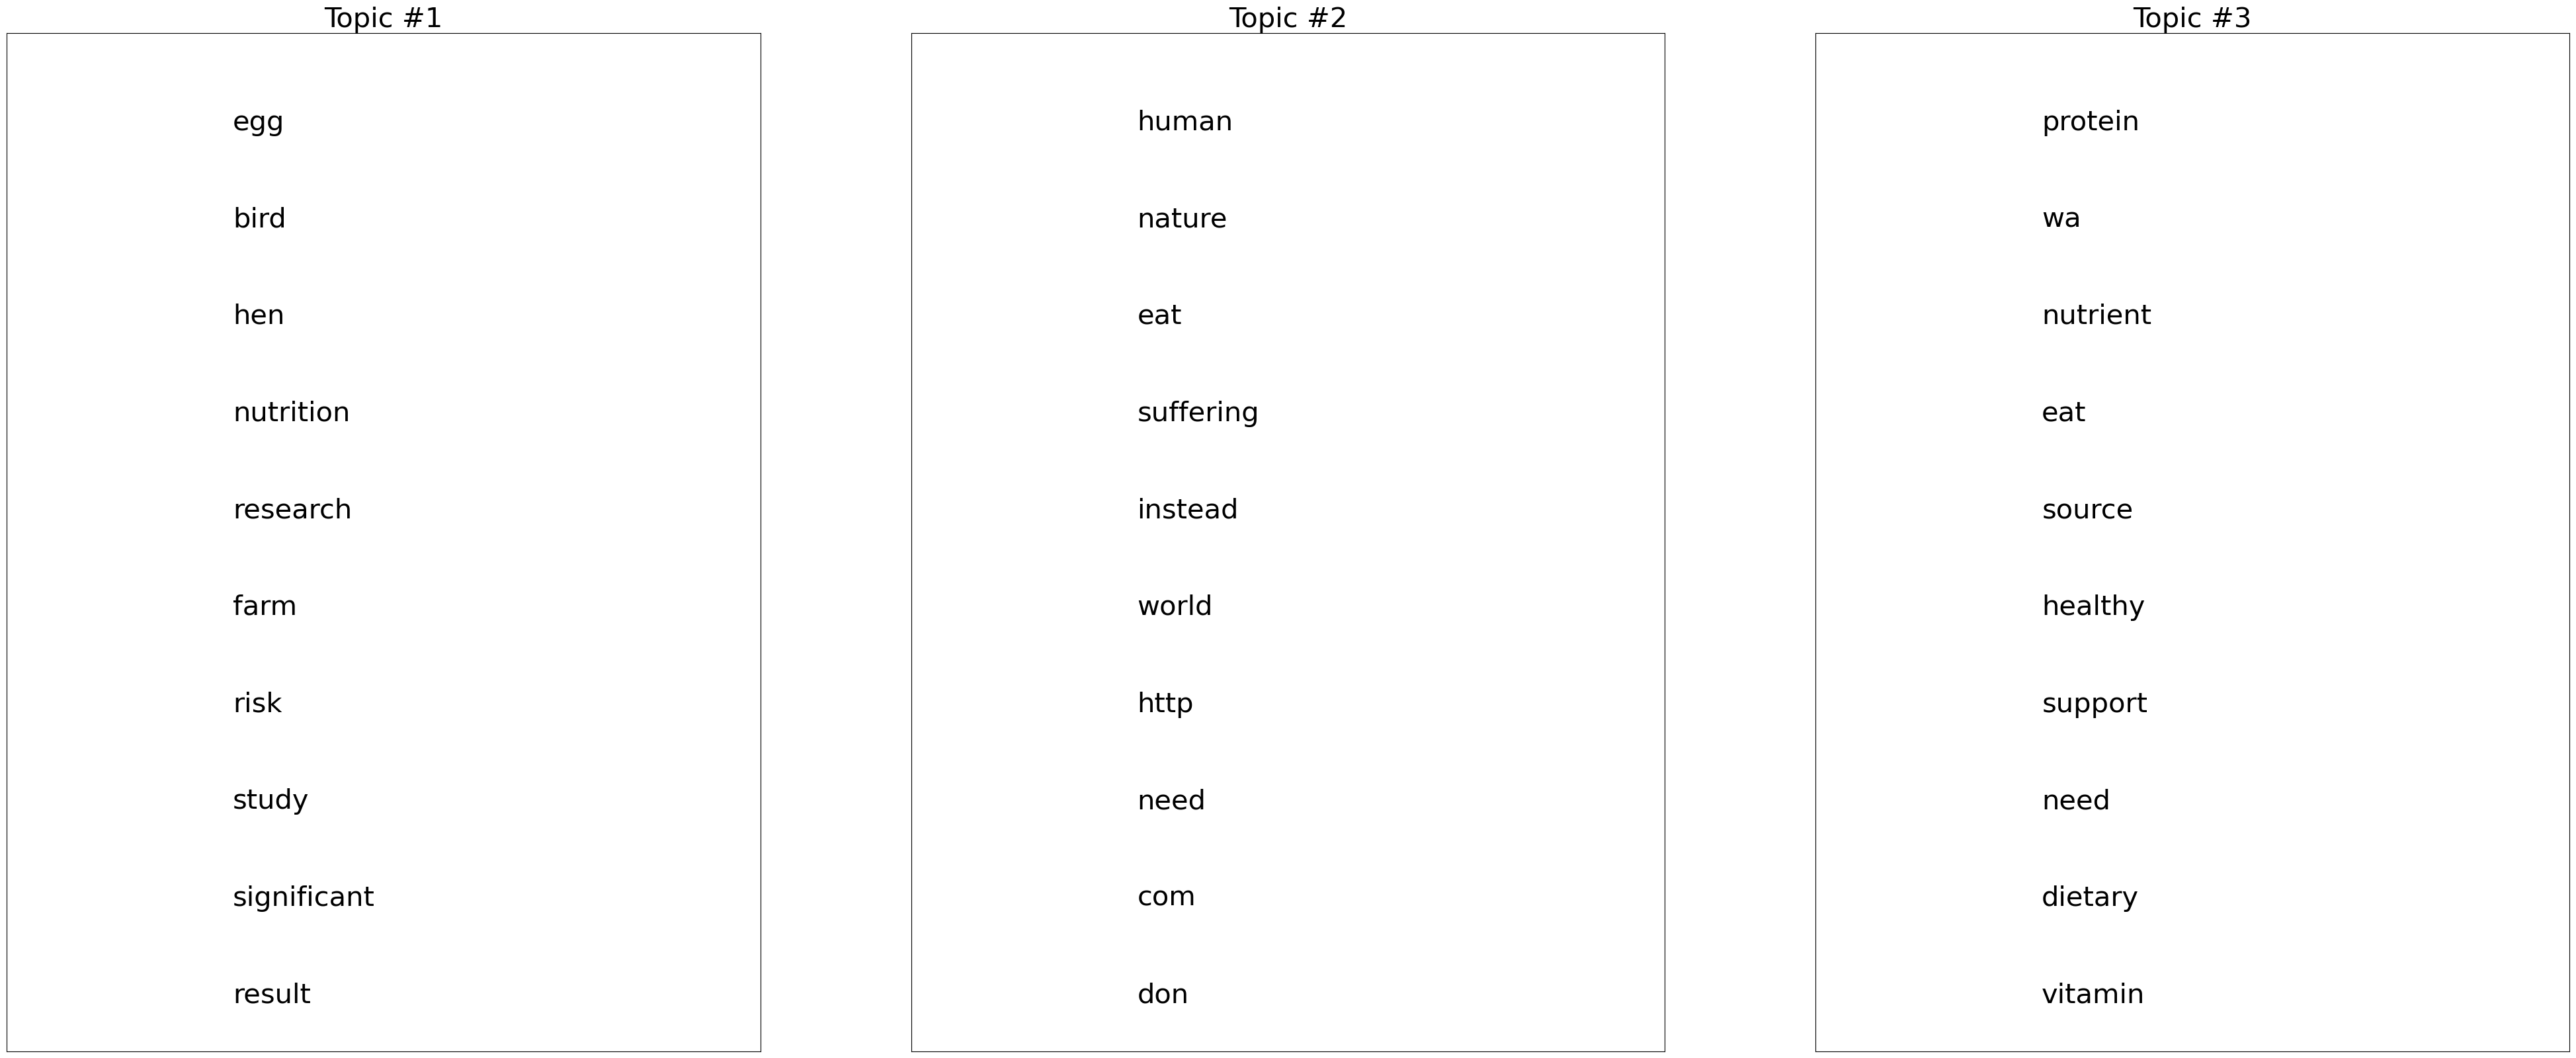

In [38]:
################ Another fun vis for LDA
plt.figure(figsize=(50,20))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(ColumnNames_s)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 60

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1), fontsize=30)
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("NegReviewTopicsVis.pdf")
plt.show()

In [41]:
###Topics modeling for pro and anti vegan articles

NUM_TOPICS=3
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(PosDF)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("Pos Review LDA Model:")
print_topics(lda_model, MyVect_LEM)



(117, 3)
Pos Review LDA Model:
Topic 0:
[('protein', 192.2443007435139), ('data', 164.84666176338797), ('muscle', 121.50225570709087), ('http', 106.9934979777763), ('image', 96.79831047108644), ('wp', 93.32234375244923), ('body', 90.6428007410055), ('com', 84.58202152712724), ('content', 71.77353006433796), ('uploads', 67.31436042710646)]
Topic 1:
[('recipe', 335.9118952727687), ('meal', 282.882903443556), ('protein', 240.05574347538018), ('milk', 218.49544734404594), ('ingredient', 203.87463293787746), ('help', 193.98455174679185), ('cream', 190.33049578455598), ('ice', 182.29322313886797), ('vegetable', 169.35210188541953), ('healthy', 160.4507564392484)]
Topic 2:
[('wa', 418.0986765764896), ('veganuary', 167.8374328277393), ('m', 147.0974916411744), ('new', 145.69580171020084), ('world', 144.75586445234248), ('change', 131.61219016740327), ('day', 124.48307335846012), ('restaurant', 123.29887817862286), ('said', 120.17090484729466), ('u', 116.96482860599777)]


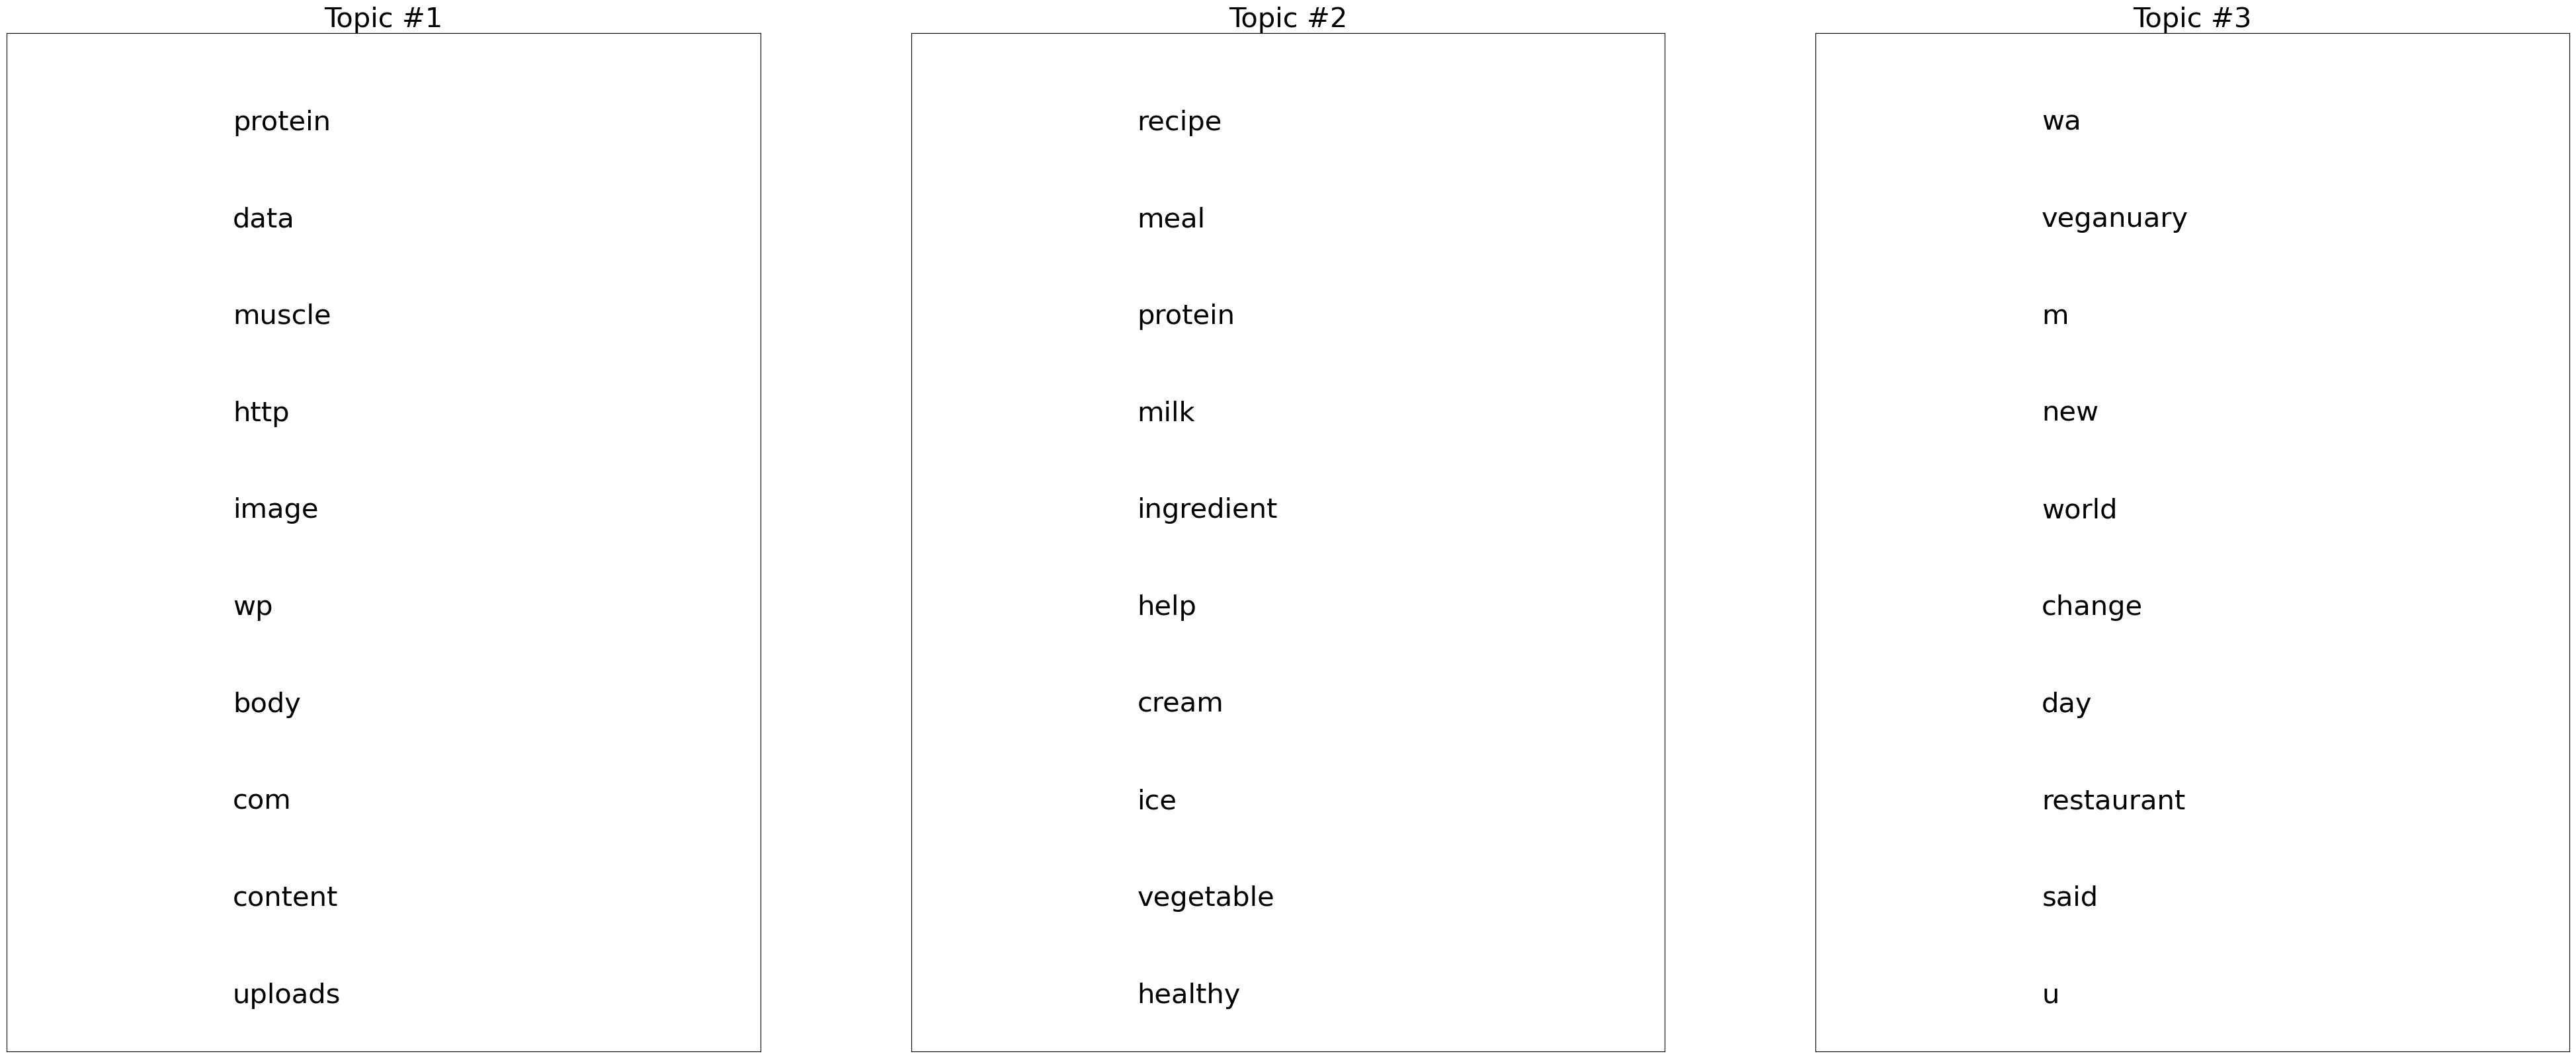

In [42]:
################ Another fun vis for LDA
plt.figure(figsize=(50,20))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(ColumnNames_s)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 60

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1), fontsize=30)
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("PosReviewTopicsVis.pdf")
plt.show()